In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cleaned_df.csv')

In [3]:
data.columns

Index(['IncidentID', 'IncidentType', 'CaseNumber', 'Suspect', 'Arrested',
       'Address', 'Victim', 'Details', 'ReleasedBy', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

**Stopwords:** 

A set of words that are not much of a concern to us. Words that belong to this category of “futile” words include those like *is, was, for, it, a, the,* etc. We use stopwords to filter out these words that aren't useful for our analysis.

In [4]:
stopwords = set(STOPWORDS)

I ran `full_details = ' '.join(data['Details'].str.lower())` to capture all the **Details** columns, but it's giving an error becaue `data['Details'][2355]` (and maybe many others) is a float value:

In [5]:
type(data['Details'][2355])

float

So I'm just converting all such instances into a string(`str`) to be able to generate a WordCloud easily:

In [6]:
for i in range(data.shape[0]):
    if type(data['Details'][i]) == float:
        data['Details'][i] = str(data['Details'][i])

In [7]:
full_details = ' '.join(data['Details'].str.lower())

In [8]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

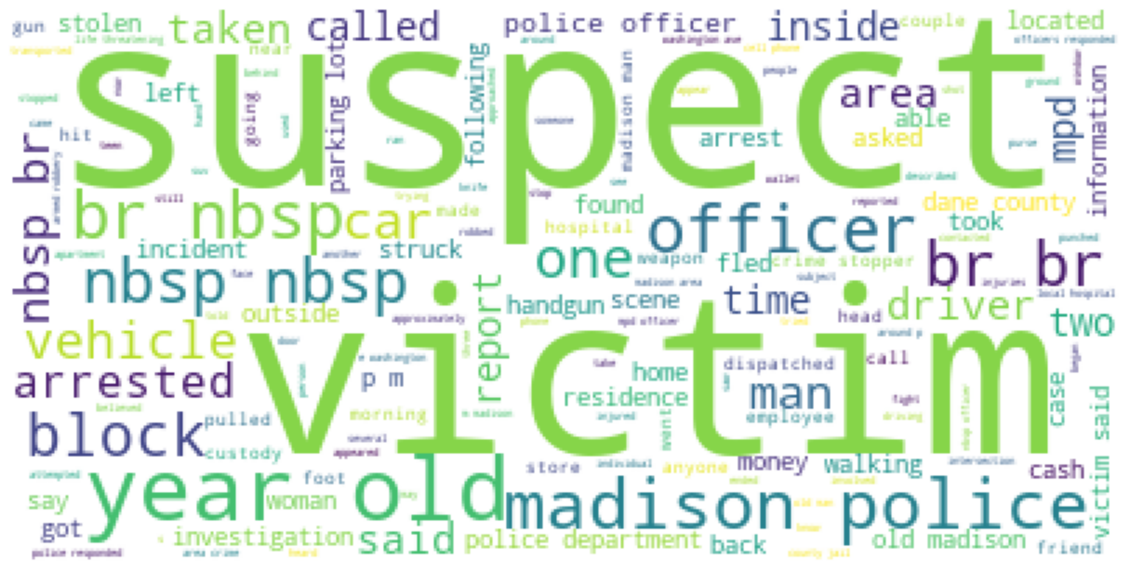

In [9]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

I see words like **suspect**, **victim**, **year**, **old** and **Madison**, which occur a lot of times, but might not be very helpful for our analysis since they're words that would naturally occur a lot in a word cloud being generated from a police dataset details column.

Trying to add them to stopwords and regenerate the wordcloud to see if that helps:

In [10]:
type(stopwords)

set

In [11]:
add_list = ['suspect', 'victim', 'year', 'old', 'madison']

for word in add_list:
    stopwords.add(word)

In [12]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

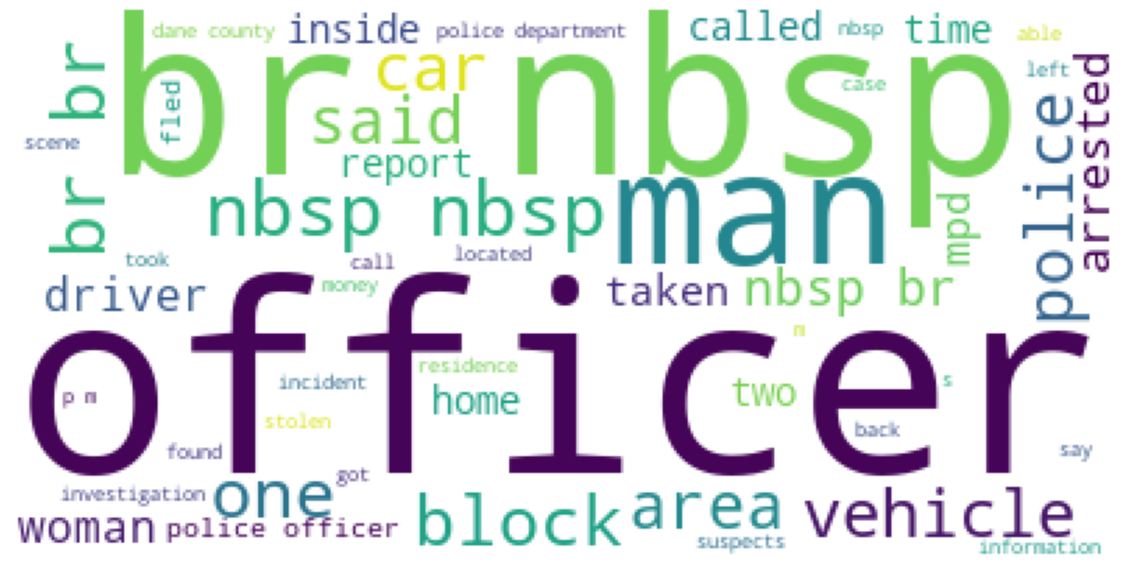

In [13]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Notice words like **nbsp** and **br** occurring repeatedly. They are the `No-Break Space` and `Break` elements, and we don't need them in the wordcloud either:

In [14]:
spec_list = ['nbsp', 'br']

for word in spec_list:
    stopwords.add(word)

In [15]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

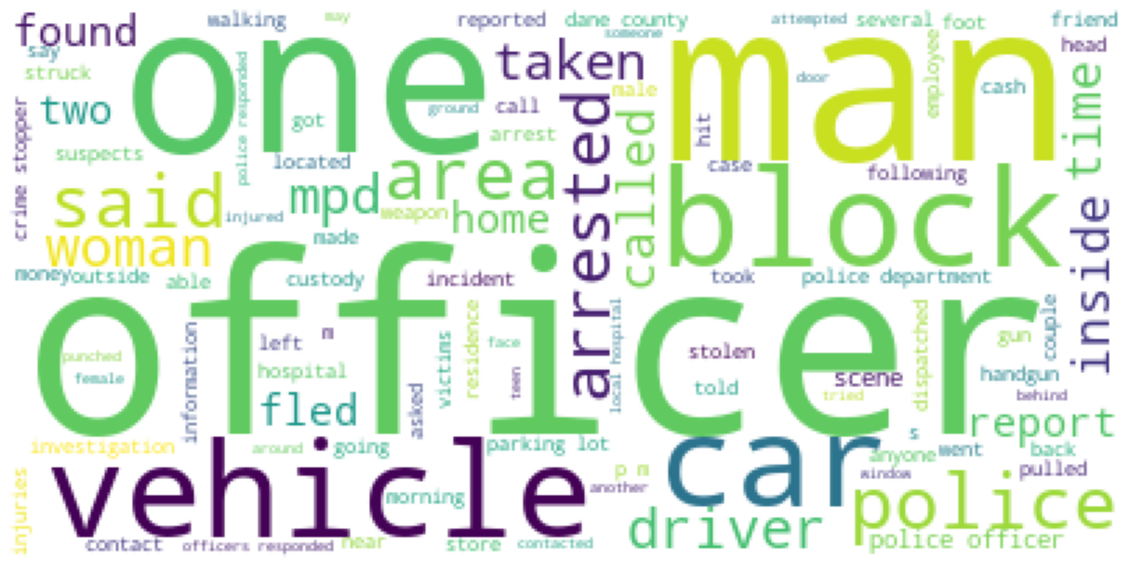

In [16]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()